In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/AI/Assessment1/dungeon_sensorstats_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/AI/Assessment1/dungeon_sensorstats_test.csv")

In [4]:
column_select = ['intelligence', 'stench', 'sound', 'heat', 'bribe']
train_subset = train_data[train_data['race'] == 'human'][column_select]
test_subset = test_data[test_data['race'] == 'human'][column_select]

train_subset.info()
test_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 1 to 7997
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   intelligence  1588 non-null   int64  
 1   stench        1588 non-null   int64  
 2   sound         1588 non-null   int64  
 3   heat          1588 non-null   int64  
 4   bribe         1588 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 74.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 5 to 1998
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   intelligence  413 non-null    int64  
 1   stench        413 non-null    int64  
 2   sound         413 non-null    int64  
 3   heat          413 non-null    int64  
 4   bribe         413 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 19.4 KB


In [5]:
X_train = train_subset[['intelligence', 'stench', 'sound', 'heat']]
y_train = train_subset['bribe']
X_test = test_subset[['intelligence', 'stench', 'sound', 'heat']]
y_test = test_subset['bribe']

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_all = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for all features:", mse_all)

Mean Squared Error for all features: 4.367935389658017


Mean Squared Error for Intelligence: 13.767361794433027


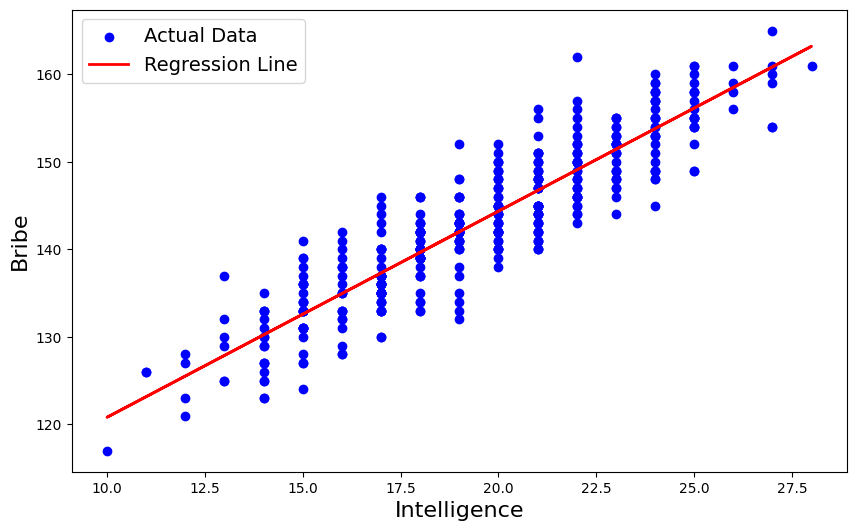

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
X_train_int = train_subset[['intelligence']]
X_test_int = test_subset[['intelligence']]

model_int = LinearRegression()
model_int.fit(X_train_int, y_train)

y_pred_int = model_int.predict(X_test_int)

mse_int = mean_squared_error(y_test, y_pred_int)
print("Mean Squared Error for Intelligence:", mse_int)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_int, y_test, color='blue', label='Actual Data')
plt.plot(X_test_int, y_pred_int, color='red', linewidth=2, label='Regression Line')
plt.legend(fontsize=14)
plt.xlabel('Intelligence', fontsize=16)
plt.ylabel('Bribe', fontsize=16)
plt.savefig("HW.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("HW.pdf")

In [ ]:
print("Mean Squared Error for all features:", mse_all)
print("Mean Squared Error for Intelligence:", mse_int)

Mean Squared Error for all features: 4.367935389658017
Mean Squared Error for Intelligence: 13.767361794433027
